In [150]:
# importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Problem Statement and Analysis of Basic Metrics
Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.
Dataset

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

Dataset link: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

Product Purchased:	KP281, KP481, or KP781

Age:	In years

Gender:	Male/Female

Education:	In years

MaritalStatus:	Single or partnered

Usage:	The average number of times the customer plans to use the treadmill each week.

Income:	Annual income (in $)

Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

Miles:	The average number of miles the customer expects to walk/run each week


Product Portfolio:

- The KP281 is an entry-level treadmill that sells for $1,500.

- The KP481 is for mid-level runners that sell for $1,750.

- The KP781 treadmill is having advanced features that sell for $2,500.


In [151]:
# importing dataset
df_aerofit = pd.read_csv("aerofit_treadmill.csv")
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [152]:
print(f"Number of data points: {df_aerofit.shape[0]}, \nNumber of Parameters: {df_aerofit.shape[1]}")


Number of data points: 180, 
Number of Parameters: 9


In [153]:
df_aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### Missing Values

In [154]:
# checking for missing values
df_aerofit.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [155]:
# checking for duplicates
df_aerofit.duplicated().sum()

0

- There are no missing values in the data.
- There are no duplicate data.
- There are 3 categorical columns and 6 numerical columns.

In [156]:
# Statistical analysis on categorical and numerical
df_aerofit.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,KP281,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0


We can see that Education, Fitness and Usage data is discrete in nature hence we need to convert it into categorical values.

In [157]:
# df_aerofit1 will have Education, Fitness and usage as numerical
df_aerofit1 = df_aerofit.copy(deep=True)

In [158]:
# Converting the categorical data
## changing "Object" dtype into "category" for consistancy in data

for col in ['Education', 'Fitness', 'Usage', 'Product','Gender', 'MaritalStatus']:
    df_aerofit[col] = df_aerofit[col].astype('category')

With 5 point summary,we can see the following things:

- range of the data
- Interquartile range
- difference between mean and median(50%). 
- if the mean and median coincide or closer to each other, not much skewness in data
- if the mean is on left side of the median , data is left skewed
- if the mean is on right side of the median, data is right skewed
- if the standard deviation is very large (keeping in view with the range) , the data is very sparsely distributed.

In [159]:
# creating list of categorical and numerical data' seperate list
cat_variables = ['Education', 'Fitness', 'Usage', 'Product','Gender', 'MaritalStatus']
num_variables = ['Age','Income','Miles']

In [160]:
df_aerofit.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [161]:
df_aerofit.skew()

Age       0.982161
Income    1.291785
Miles     1.724497
dtype: float64

Age
* The range of age of population is 18-50
* The Middle range of people is between 24-33.
* There is low skewness in the age distribution as mean and median(50%) are closer.

Income
* The Income of people lies between the range of 29.5K-104.5K.
* Most of the people are earning 44K-58K
* Mean is right side of the Median then we can say that data is right skewed.
* Standard Deviation is very high.

Miles
* Wide range of distance people are expecting to run. Ranges from 21-360 miles.
* Mean is right side of the median. Therefore the data is right skewed. Can be confirmed from the skewness above.
* Std deviation is high.
* Most common distance is 66 to 114. 


# Non-Graphical Analysis

* Values counts 
* Unique Values

We will be getting Values count for the Categorical variables only as it wouldn't make any sense on the numerical data.

In [162]:
df_aerofit.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [163]:
for col in df_aerofit.columns:
    if df_aerofit[col].dtype == 'category':
        print(f"Number of Uniques values in {col}:{df_aerofit[col].nunique()}")
        print(df_aerofit[col].value_counts())
        print("*"*100)

Number of Uniques values in Product:3
KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64
****************************************************************************************************
Number of Uniques values in Gender:2
Male      104
Female     76
Name: Gender, dtype: int64
****************************************************************************************************
Number of Uniques values in Education:8
16    85
14    55
18    23
13     5
15     5
12     3
21     3
20     1
Name: Education, dtype: int64
****************************************************************************************************
Number of Uniques values in MaritalStatus:2
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
****************************************************************************************************
Number of Uniques values in Usage:6
3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64
**************************************

# Visual Analysis
* Univariate Analysis
* Bivariate Analysis

## Continous Variables
- Age
- Income
- Miles

### Distplot

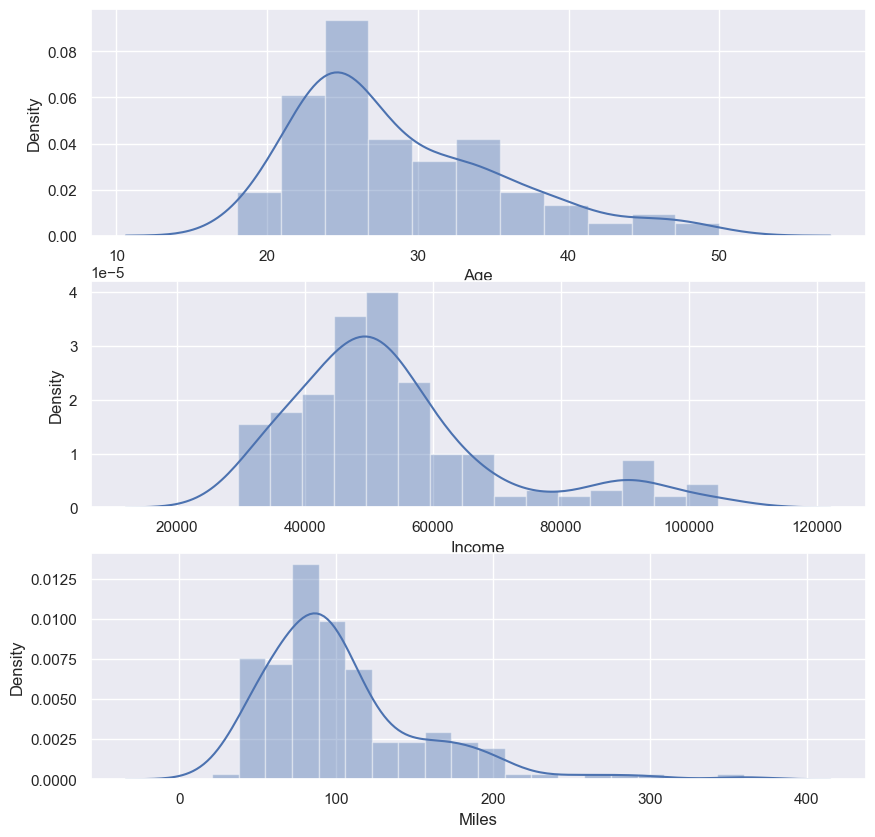

In [164]:
fig, axis = plt.subplots(nrows=3, ncols=1, figsize=(10,10))

sns.distplot(df_aerofit['Age'], ax=axis[0])
sns.distplot(df_aerofit['Income'],ax=axis[1])
sns.distplot(df_aerofit['Miles'],ax=axis[2])
plt.show()

- Our customers are widely spread in the higher miles range.
- The income range of the people is showing two peaks and looks like the data is rightskewed indicating outlier on the right.



### Box Plots

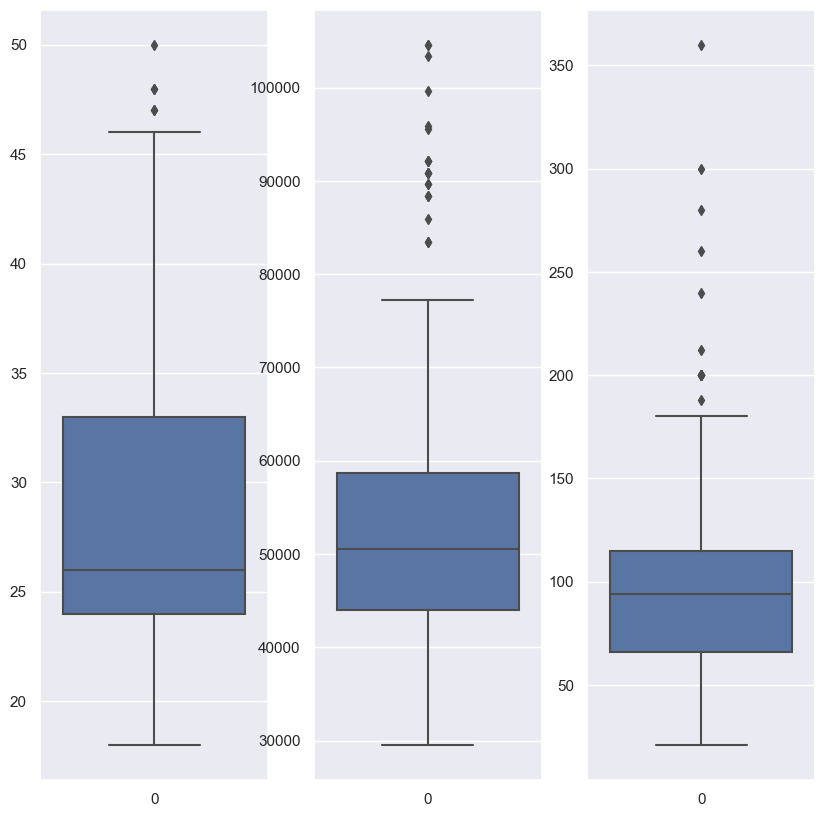

In [165]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(10,10))

sns.boxplot(df_aerofit['Age'], ax=axis[0])
sns.boxplot(df_aerofit['Income'],ax=axis[1])
sns.boxplot(df_aerofit['Miles'],ax=axis[2])
plt.show()

Observation : Miles
    
- Outlier are present on the higher values of the data.
- Customer are planning to run more then 180 miles.
- The data is uniformly distributed in IQR.

Inference :
- Customer are widely spread in the higher miles range.


Observation : Income
- As seen in the earlier plot, outliers are present on the higher value of data.
- The data is uniformly distributed in the IQR.

Inference :
- Customers are widely spread in the higher income range.

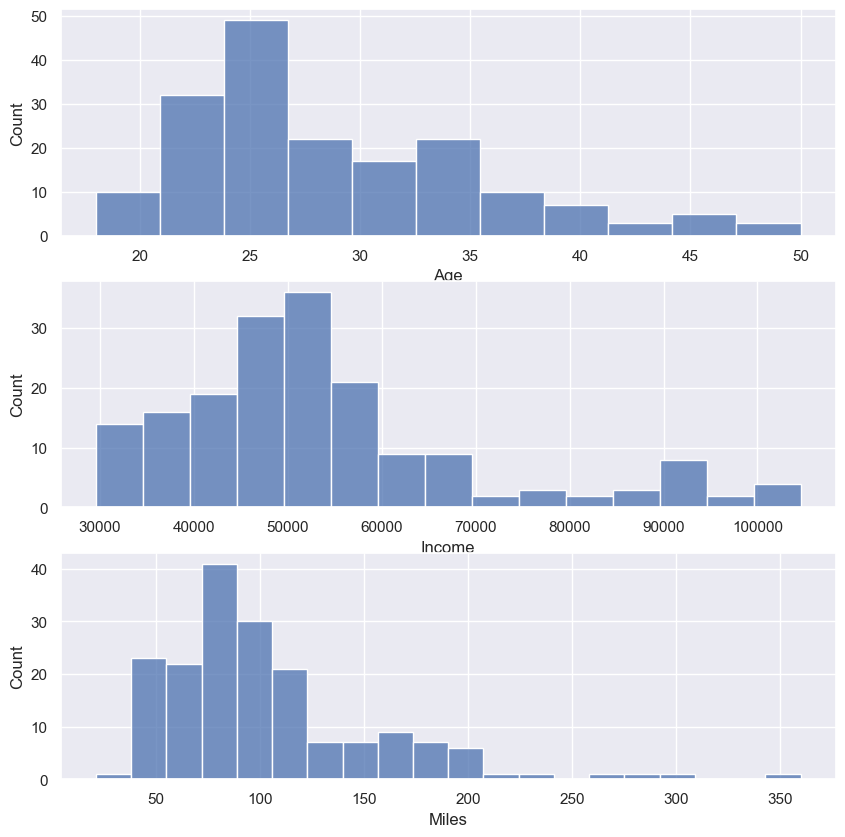

In [166]:
fig, axis = plt.subplots(nrows=3, ncols=1, figsize=(10,10))

sns.histplot(df_aerofit['Age'], ax=axis[0])
sns.histplot(df_aerofit['Income'],ax=axis[1])
sns.histplot(df_aerofit['Miles'],ax=axis[2])
plt.show()

Observation

- The number of customers in the age range 20 to 28 is the highest.
- We have very less customers above age 40.
- The 90 % customers are in the age range 20 to 40.
- This shows that young people are more conscious about their health.
- There are very few people running more than 200 miles.

### Count plots

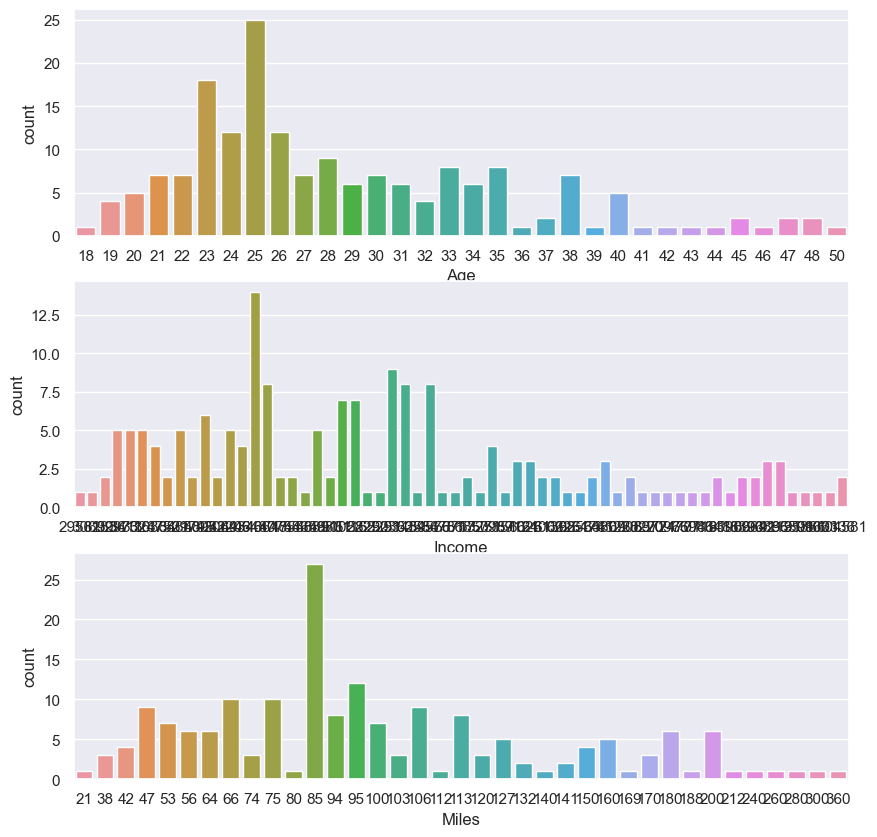

In [167]:
fig, axis = plt.subplots(nrows=3, ncols=1, figsize=(10,10))

sns.countplot(data = df_aerofit,x ='Age', ax=axis[0])
sns.countplot(data=df_aerofit, x = 'Income',ax=axis[1])
sns.countplot(data=df_aerofit, x='Miles',ax=axis[2])
plt.show()

In [168]:
df_aerofit.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

## Categorical Variables
- Product
- Gender
- Education
- MaritalStaus
- Usage
- Fitness


### Count Plots

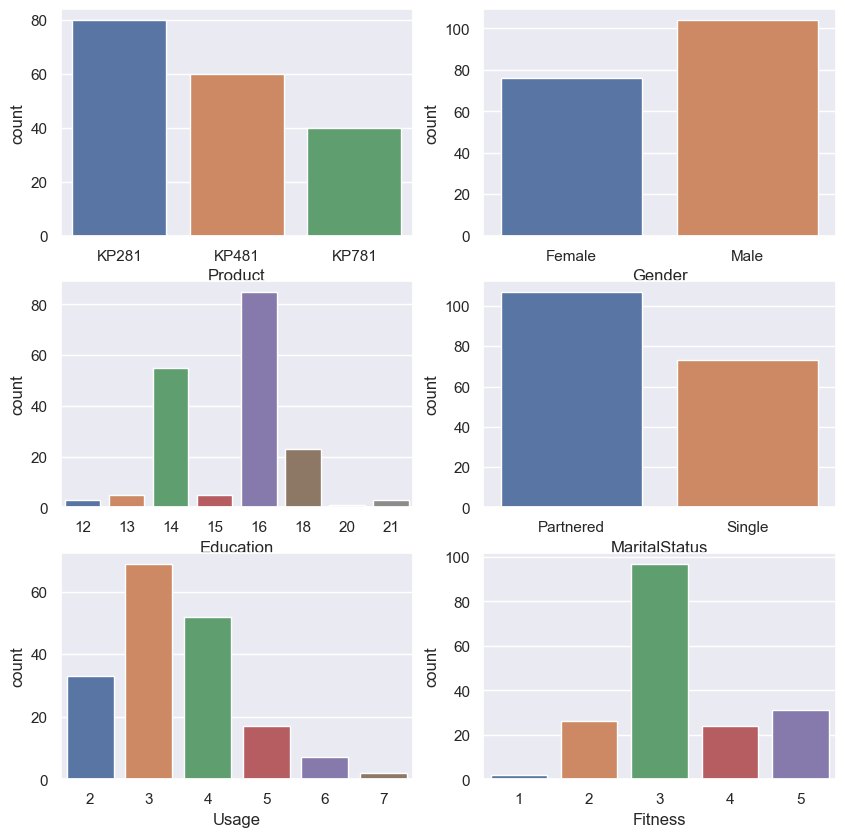

In [169]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10,10))

sns.countplot(data=df_aerofit, x ='Product', ax=axis[0,0])
sns.countplot(data=df_aerofit,x='Gender',ax=axis[0,1])
sns.countplot(data=df_aerofit,x='Education',ax=axis[1,0])
sns.countplot(data=df_aerofit,x='MaritalStatus',ax=axis[1,1])
sns.countplot(data=df_aerofit,x='Usage',ax=axis[2,0])
sns.countplot(data=df_aerofit,x='Fitness',ax=axis[2,1])
plt.show()

Observation:
- Married people tend to buy treadmills more. 
- People with 16 years of education tend to buy most. followed buy 14 years of education. 
- We can see that there is sudden dip between the 14 and 16 years of eduction. We can look into that.
- KP281 is the most selling product.
- Looking at the usage pattern. Most people wants to use 3 times a week after that trend starting to decrease. 
- Most of the people tend to think that they are at a okay level of fitness. This can be because of self doubt. - Male purchase the treadmill more but the difference is not very high.  


### Box Plots

### Bivariate analysis

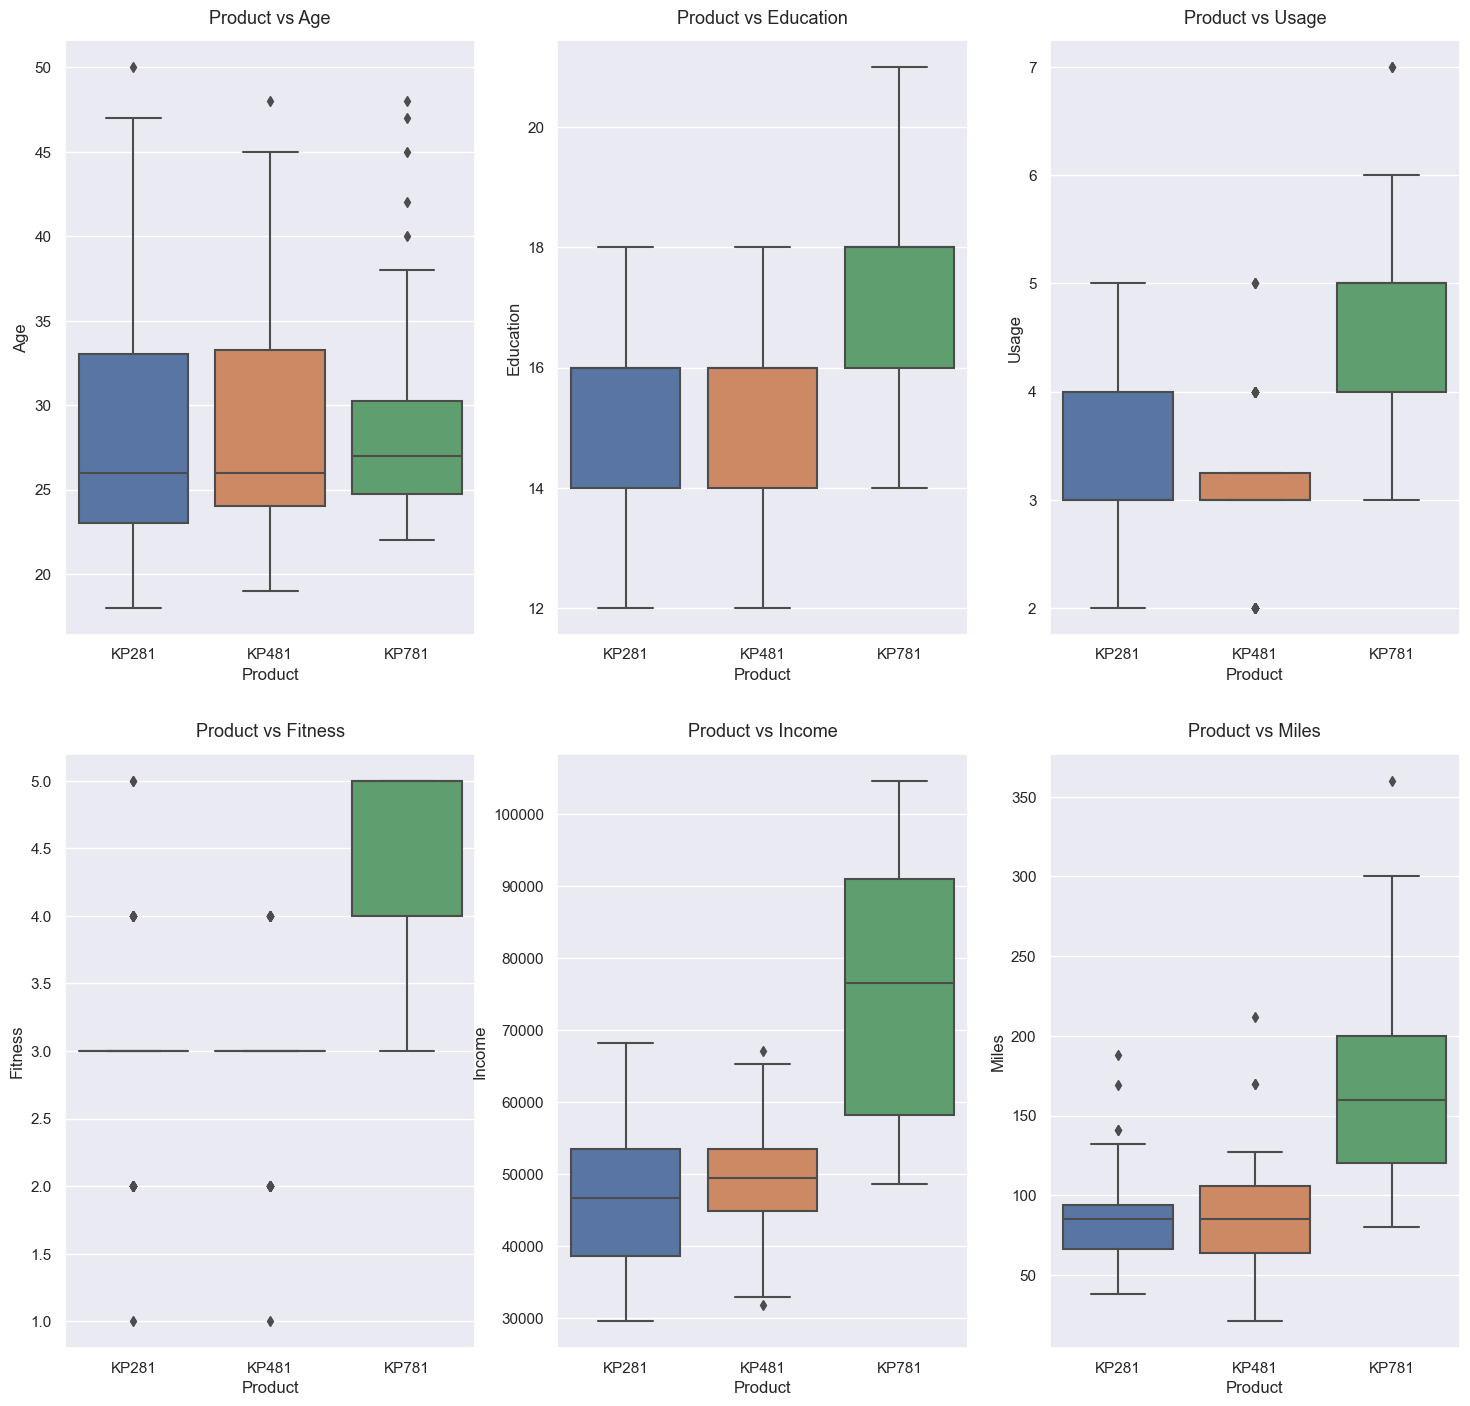

In [175]:
# here we are considering all the attributes as numerical values to get the box plots
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set(color_codes = True)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df_aerofit1, x='Product', y=attributes[count], ax=axs[i,j])
        axs[i,j].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=13)
        count += 1

### Marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table

In [178]:
aerofit_df1 = df_aerofit[['Product', 'Gender', 'MaritalStatus']].melt()
(aerofit_df1.groupby(['variable', 'value'])[['value']].count() / len(df_aerofit)).mul(100).round(3).astype(str) + '%'

value
variable      value             
Gender        Female     42.222%
              Male       57.778%
MaritalStatus Partnered  59.444%
              Single     40.556%
Product       KP281      44.444%
              KP481      33.333%
              KP781      22.222%

In [187]:
pd.crosstab(df_aerofit1["Product"], df_aerofit1["Gender"],margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


### Checking if features like `Gender` or `MaritalStatus`have any effect on the product purchased

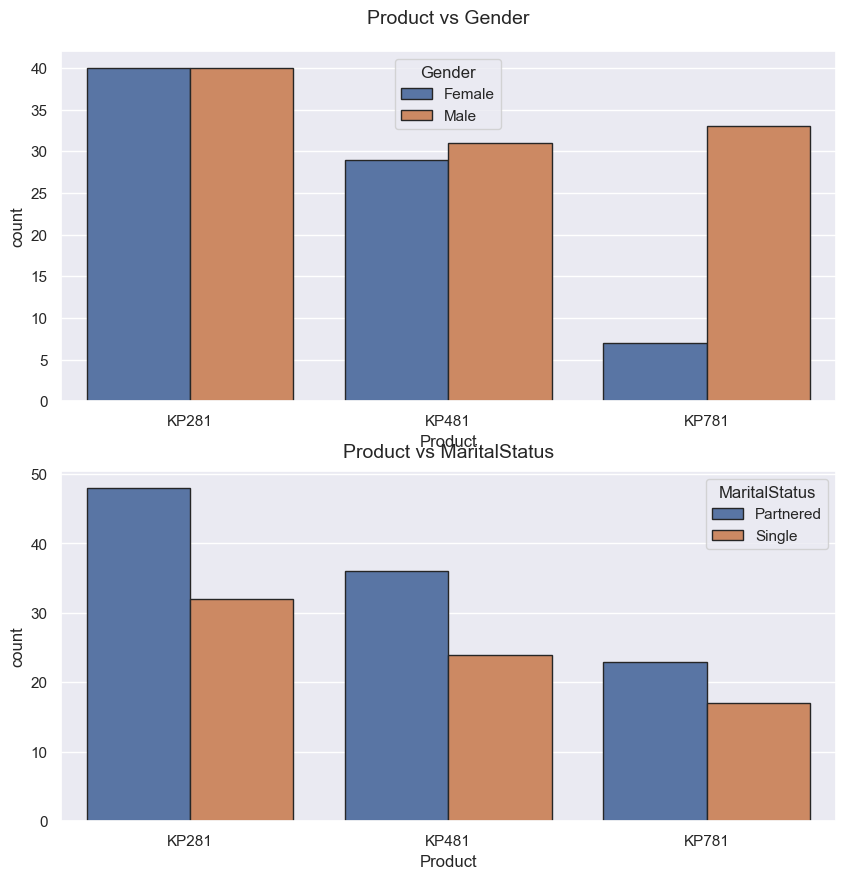

In [197]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
sns.countplot(data=df_aerofit, x='Product', hue='Gender', edgecolor="0.15", ax=axs[0])
sns.countplot(data=df_aerofit, x='Product', hue='MaritalStatus', edgecolor="0.15", ax=axs[1])
axs[0].set_title("Product vs Gender", pad=20, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

Obervations

- Product vs Gender
    - Equal number of males and females have purchased KP281 product and Almost same for the product KP481
    - Most of the `Male` customers have purchased the KP781 product.
    
    
- Product vs MaritalStatus
    - Customer who is `Partnered`, is more likely to purchase the product.

### Multivariate Analysis

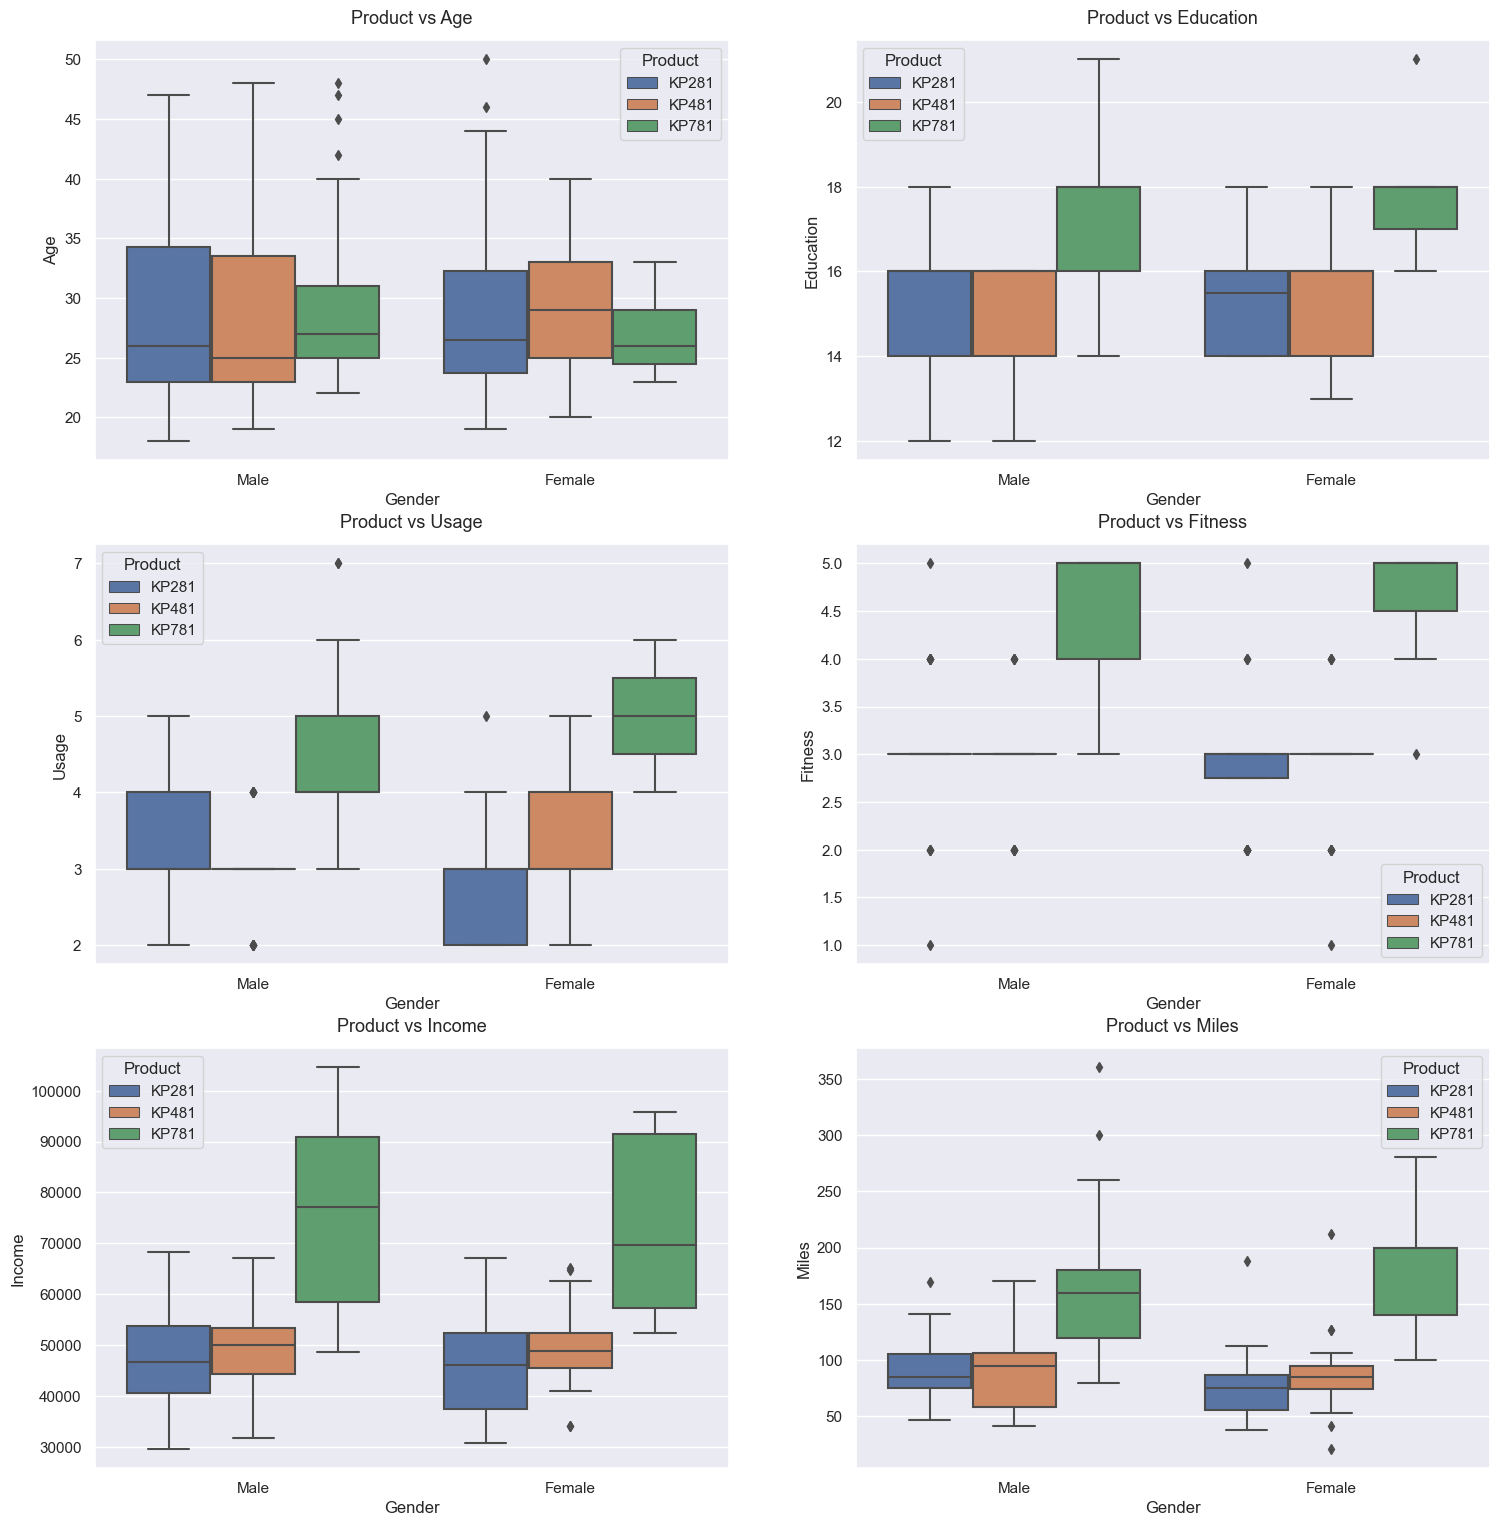

In [201]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set(color_codes = True)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1.3)
count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=df_aerofit1, x='Gender', y=attributes[count], hue='Product', ax=axs[i,j])
        axs[i,j].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=13)
        count += 1

Obervations

- Females planning to use treadmill 3-4 times a week, are more likely to buy KP481 product

## Correlation

In [205]:
df_aerofit.corr()

,Age,Income,Miles
Age,1.000000,0.513414,0.036618
Income,0.513414,1.000000,0.543473
Miles,0.036618,0.543473,1.000000


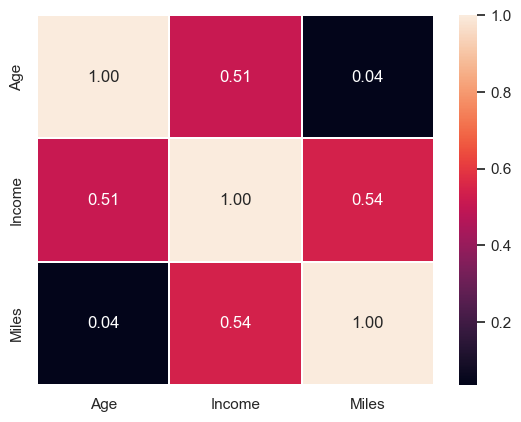

In [207]:
fig, ax = plt.subplots()
sns.set(color_codes = True)
sns.heatmap(df_aerofit.corr(), ax=ax, annot = True, linewidths = 0.05, fmt ='0.2f')
plt.show()

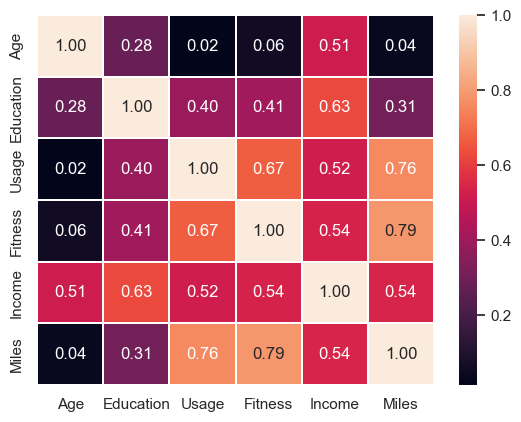

In [208]:
fig, ax = plt.subplots()
sns.set(color_codes = True)
sns.heatmap(df_aerofit1.corr(), ax=ax, annot = True, linewidths = 0.05, fmt ='0.2f')
plt.show()

Observations:

-   (Miles & Fitness) and (Miles & Usage) attributes are highly correlated, which means if a customer's fitness level is high they use more treadmills.

-   Income and Education shows a strong correlation. High-income and highly educated people prefer KP781 treadmill which is having advanced features.

-   There is no correlation between (Usage & Age) or (Fitness & Age) attributes, which mean Age should not be barrier to use treadmills or specific model of treadmills.

## Pair Plots

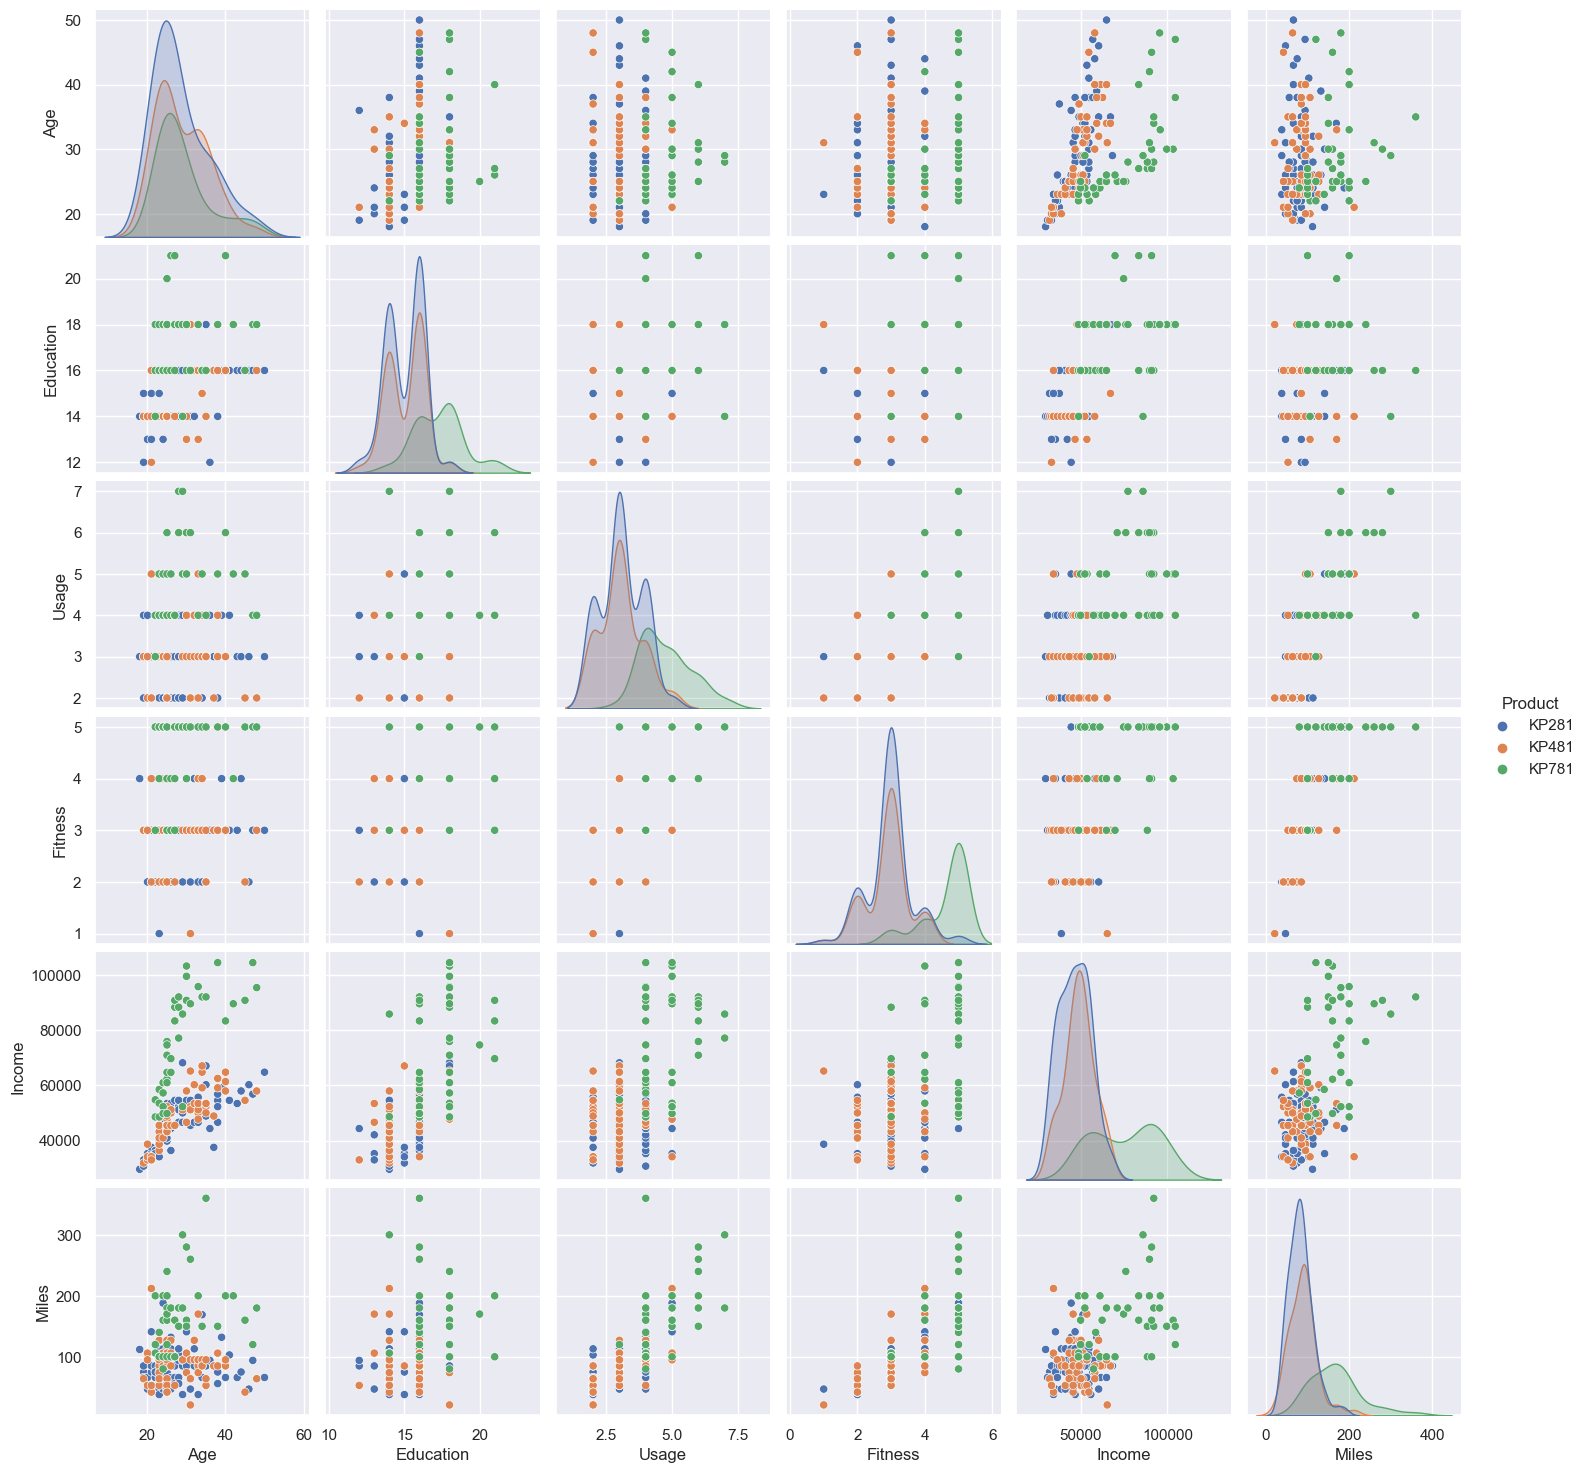

In [211]:
sns.pairplot(df_aerofit1, hue = "Product")
plt.show()

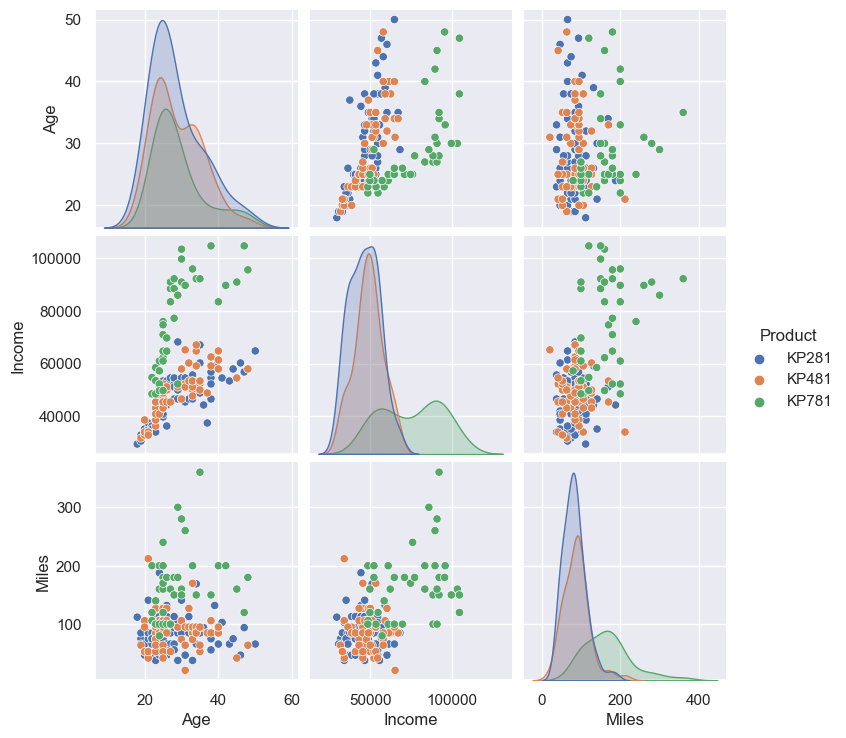

In [210]:
sns.pairplot(df_aerofit, hue = "Product")
plt.show()

- Looking at the pair plots we can see that using Miles, Age and Income as numerical values makes more sense

# Computing Marginal & Conditional Probabilities

## Marginal Probability

In [213]:
df_aerofit['Product'].value_counts(normalize=True).mul(100).round(3).astype(str) + '%'

KP281    44.444%
KP481    33.333%
KP781    22.222%
Name: Product, dtype: object

## Conditional Probs

In [221]:
def p_prod_given_gender(gender, print_marginal=False):
    if gender is not "Female" and gender is not "Male":
        return "Invalid gender value."
    
    df_aerfit2 = pd.crosstab(index=df_aerofit['Gender'], columns=[df_aerofit['Product']])
    p_281 = df_aerfit2['KP281'][gender] / df_aerfit2.loc[gender].sum()
    p_481 = df_aerfit2['KP481'][gender] / df_aerfit2.loc[gender].sum()
    p_781 = df_aerfit2['KP781'][gender] / df_aerfit2.loc[gender].sum()
    
    if print_marginal:
        print(f"P(Male): {df_aerfit2.loc['Male'].sum()/len(df_aerofit):.2f}")
        print(f"P(Female): {df_aerfit2.loc['Female'].sum()/len(df_aerofit):.2f}\n")
    
    print(f"P(KP281/{gender}): {p_281:.2f}") 
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP781/{gender}): {p_781:.2f}\n")
    
p_prod_given_gender('Male', True)
p_prod_given_gender('Female')

P(Male): 0.58
P(Female): 0.42

P(KP281/Male): 0.38
P(KP481/Male): 0.30
P(KP781/Male): 0.32

P(KP281/Female): 0.53
P(KP481/Female): 0.38
P(KP781/Female): 0.09



What is the probability of a customer based on MaritalStatus ( Single or Partnered ) buying a certain treadmill Product?

In [226]:
def p_prod_given_mstatus(status, print_marginal=False):
    if status is not "Single" and status is not "Partnered":
        return "Invalid marital status value."
    
    aerofit_df1 = pd.crosstab(index=df_aerofit['MaritalStatus'], columns=[df_aerofit['Product']])
    p_281 = aerofit_df1['KP281'][status] / aerofit_df1.loc[status].sum()
    p_481 = aerofit_df1['KP481'][status] / aerofit_df1.loc[status].sum()
    p_781 = aerofit_df1['KP781'][status] / aerofit_df1.loc[status].sum()
    
    if print_marginal:
        print(f"P(Single): {aerofit_df1.loc['Single'].sum()/len(df_aerofit):.2f}")
        print(f"P(Partnered): {aerofit_df1.loc['Partnered'].sum()/len(df_aerofit):.2f}\n")
    
    print(f"P(KP281/{status}): {p_281:.2f}") 
    print(f"P(KP481/{status}): {p_481:.2f}")
    print(f"P(KP781/{status}): {p_781:.2f}\n")
    
p_prod_given_mstatus('Single', True)
p_prod_given_mstatus('Partnered')

P(Single): 0.41
P(Partnered): 0.59

P(KP281/Single): 0.44
P(KP481/Single): 0.33
P(KP781/Single): 0.23

P(KP281/Partnered): 0.45
P(KP481/Partnered): 0.34
P(KP781/Partnered): 0.21



## Probability of buying treadmills on the basis of Age, Gender, Income

#### Product-Gender

In [228]:
pd.crosstab(index=df_aerofit['Product'], columns=[df_aerofit['Gender']],margins=True) 

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [233]:
print(f"Prob of male buying treadmill: {round(((104/180)),2)}")

# Percentage of Female customer buying treadmill given that Product is KP281
#P(A|B) = P(A,B)/P(B) - Baye's Theorem
#P(Female|KP281) = P(Female,KP281)/P(KP281)
print(f"Percentage of Female customer buying treadmill given that Product is KP281: {((40/80))}")


Prob of male buying treadmill: 0.58
Percentage of Female customer buying treadmill given that Product is KP281: 0.5


#### Product-Age

In [239]:
aerofit_df2 = df_aerofit.copy(deep=True)

In [240]:
# Added 2 new feature from Age
# "AgeCategory" - Teens, 20s, 30s and Above 40s
# "AgeGroup" - 14-20 , 20-30, 30-40 & 40-60

bins = [14,20,30,40,60]
labels =["Teens","20s","30s","Above 40s"]
aerofit_df2['AgeGroup'] = pd.cut(aerofit_df2['Age'], bins)
aerofit_df2['AgeCategory'] = pd.cut(aerofit_df2['Age'], bins,labels=labels)

In [241]:
aerofit_df2.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,AgeCategory
0,KP281,18,Male,14,Single,3,4,29562,112,"(14, 20]",Teens
1,KP281,19,Male,15,Single,2,3,31836,75,"(14, 20]",Teens
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(14, 20]",Teens
3,KP281,19,Male,12,Single,3,3,32973,85,"(14, 20]",Teens
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(14, 20]",Teens


In [242]:
pd.crosstab(index=aerofit_df2['Product'], columns=[aerofit_df2['AgeCategory']],margins=True) 

AgeCategory,Teens,20s,30s,Above 40s,All
Product,,,,,
KP281,6,49,19,6,80
KP481,4,31,23,2,60
KP781,0,30,6,4,40
All,10,110,48,12,180


- Teen doesnot prefer to buy KP781
- 61% of customer with Age group between 20 and 30 purchase treadmills.

#### Product-Income 

In [243]:
aerofit_df3 = df_aerofit.copy(deep=True)

In [244]:
# Added 1 new categorial feature based on the Income
# "IncomeCategory" - Low Income, Lower-middle Income, Upper-Middle Income and High Income

bins_income = [29000, 35000, 60000, 85000,105000]
labels_income = ['Low Income','Lower-middle Income','Upper-Middle Income', 'High Income']
aerofit_df3['IncomeCategory'] = pd.cut(aerofit_df3['Income'],bins_income,labels = labels_income)

In [245]:
pd.crosstab(index=aerofit_df3['Product'], columns=[aerofit_df3['IncomeCategory']],margins=True) 

IncomeCategory,Low Income,Lower-middle Income,Upper-Middle Income,High Income,All
Product,,,,,
KP281,8,66,6,0,80
KP481,6,47,7,0,60
KP781,0,11,12,17,40
All,14,124,25,17,180


In [246]:
# Percentage of a high-income customer purchasing a treadmill (Marginal Probability)
# Sum of the treadmill purchased by high income customer by total no. of customers.
prob = round(14/180,2)
pct = round(prob*100,2)
pct

8.0

In [247]:
# Percentage of a High-income customer purchasing KP781 treadmill (Joint Probability)
# Sum of the treadmill with model KP781 purchased by high income customer by total no. of customers.
prob = round(17/180,2)
pct = round(prob*100,2)
pct

9.0

In [248]:
# Percentage of customer with high-Income salary buying treadmill given that Product is KP781 (Conditional Probability)
prob = round(17/17,2)
pct = round(prob*100,2)
pct # Customers having salary more than $ dollar 85,000 buys KP781 (high-end Model).

100.0

#### Product - Marital status

In [249]:
pd.crosstab(index=df_aerofit['Product'], columns=[df_aerofit['MaritalStatus']],margins=True) 

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [250]:
# Percentage of a customers who are partnered using treadmills 
prob = round((107/180),2)
pct = round(prob*100,2)
pct # 59 percent of customer with mMaritalStatus as Partnered by the treadmills.

59.0

# Outlier Handling
- We will be handling outliers on our Numerical values only.
- Age, Income and Miles

In [253]:
df_outlier_handling = df_aerofit.copy(deep=True)

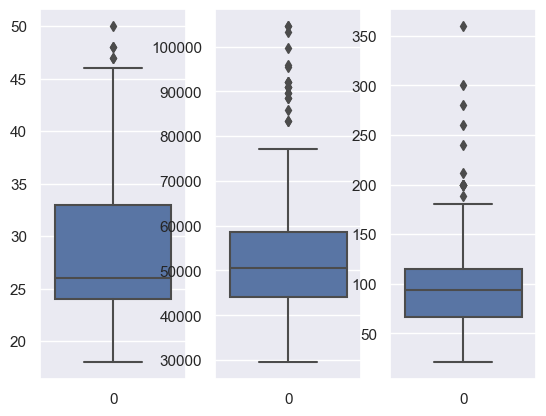

In [254]:
fig, axis = plt.subplots(nrows=1, ncols=3)

sns.boxplot(df_outlier_handling['Age'], ax=axis[0])
sns.boxplot(df_outlier_handling['Income'],ax=axis[1])
sns.boxplot(df_outlier_handling['Miles'],ax=axis[2])
plt.show()

In [257]:
# function to remove outliers
def remove_outliers(df, col):
    Q3 = df[col].quantile(0.75)
    Q1 = df[col].quantile(0.25)
    IQR = Q3-Q1
    df_outremoved = df[(df[col] > Q1 - 1.5*IQR) & (df[col] < Q3 + 1.5*IQR)]
    return df_outremoved
    

In [259]:
df_outlier_handling = remove_outliers(df_outlier_handling, 'Age')
df_outlier_handling = remove_outliers(df_outlier_handling, 'Income')
df_outlier_handling = remove_outliers(df_outlier_handling, 'Miles')

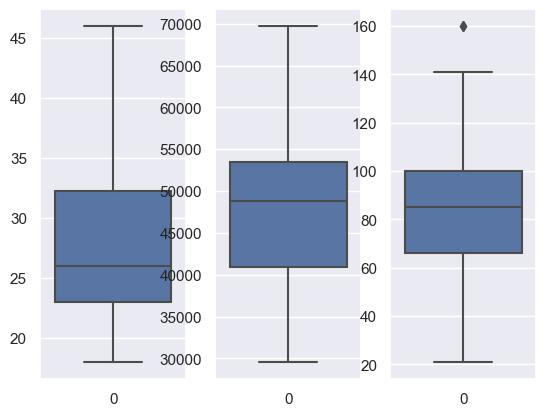

In [260]:
fig, axis = plt.subplots(nrows=1, ncols=3)

sns.boxplot(df_outlier_handling['Age'], ax=axis[0])
sns.boxplot(df_outlier_handling['Income'],ax=axis[1])
sns.boxplot(df_outlier_handling['Miles'],ax=axis[2])
plt.show()

In [262]:
print(f"Shape rows with outlier: {df_aerofit.shape[0]}")
print(f"Shape rows without outlier: {df_outlier_handling.shape[0]}")

Shape rows with outlier: 180
Shape rows without outlier: 144


It's true that there are outliers, but they may provide many insights for high-end models that can benefit companies more. Therefore, they should not be removed for further analysis.

# Business Insights based on the analysis
- Done with the Visual analysis

- Our customers are widely spread in the higher miles range.
- The income range of the people is showing two peaks and looks like the data is rightskewed indicating outlier on the right.

Observation : Miles
    
- Outlier are present on the higher values of the data.
- Customer are planning to run more then 180 miles.
- The data is uniformly distributed in IQR.

Inference :
- Customer are widely spread in the higher miles range.


Observation : Income
- As seen in the earlier plot, outliers are present on the higher value of data.
- The data is uniformly distributed in the IQR.

Inference :
- Customers are widely spread in the higher income range.

Observation:
- Married people tend to buy treadmills more. 
- People with 16 years of education tend to buy most. followed buy 14 years of education. 
- We can see that there is sudden dip between the 14 and 16 years of eduction. We can look into that.
- KP281 is the most selling product.
- Looking at the usage pattern. Most people wants to use 3 times a week after that trend starting to decrease. 
- Most of the people tend to think that they are at a okay level of fitness. This can be because of self doubt. - Male purchase the treadmill more but the difference is not very high.  


# Recommendations


  - Most of the people has marked them as average fitness level. This may not be the best way to gauge. There is scope to improve.
  - We have notice on 14 years and 16 years of education people are buying at a very high rate. But there is a sudden drop at 15. This can be investigated via some survey.
  
  - Model KP281 is the best-selling product. 44.0% of all treadmill sales go to model KP281.
  - The majority of treadmill customers fall within the $45K - $ 80K  income bracket. 83 % of treadmills are bought by individuals with incomes between $ 35K and $ 85K.
  
  - Most of the people buy treadmill at young age i.e. 20 to 40. This accounts for 88% of total sales.
  - Miles and Fitness** & Miles and Usage are highly correlated, which means if a customer's fitness level is high they use more treadmills.

  - KP781 is the only model purchased by a customer who has more than 20 years of education and an income of over $85K
  - Customer with good fitness(level 4 and 5) tend to buy expensive Highest model.

  - KP281 & KP481 are popular with customer income of medium range.
  - KP781 should be marketed as a Premium Model among high income and fitness enthusists.
  - People with lower income then $ 35K are not buying 